In [151]:
import warnings
warnings.filterwarnings('ignore')

#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [152]:
vc = pd.read_csv('voice.csv')
vc.head(6)

meanfreq        sd    median       Q25       Q75       IQR       skew  \
0  0.059781  0.064241  0.032027  0.015071  0.090193  0.075122  12.863462   
1  0.066009  0.067310  0.040229  0.019414  0.092666  0.073252  22.423285   
2  0.077316  0.083829  0.036718  0.008701  0.131908  0.123207  30.757155   
3  0.151228  0.072111  0.158011  0.096582  0.207955  0.111374   1.232831   
4  0.135120  0.079146  0.124656  0.078720  0.206045  0.127325   1.101174   
5  0.132786  0.079557  0.119090  0.067958  0.209592  0.141634   1.932562   

          kurt    sp.ent       sfm  ...  centroid   meanfun    minfun  \
0   274.402905  0.893369  0.491918  ...  0.059781  0.084279  0.015702   
1   634.613855  0.892193  0.513724  ...  0.066009  0.107937  0.015826   
2  1024.927705  0.846389  0.478905  ...  0.077316  0.098706  0.015656   
3     4.177296  0.963322  0.727232  ...  0.151228  0.088965  0.017798   
4     4.333713  0.971955  0.783568  ...  0.135120  0.106398  0.016931   
5     8.308895  0.963181  0.738307  ...  0.132786  0.110132  0.017112   

     maxfun   meandom    mindom    maxdom   dfrange   modindx  label  
0  0.275862  0.007812  0.007812  0.007812  0.000000  0.000000   male  
1  0.250000  0.009014  0.007812  0.054688  0.046875  0.052632   male  
2  0.271186  0.007990  0.007812  0.015625  0.007812  0.046512   male  
3  0.250000  0.201497  0.007812  0.562500  0.554688  0.247119   male  
4  0.266667  0.712812  0.007812  5.484375  5.476562  0.208274   male  
5  0.253968  0.298222  0.007812  2.726562  2.718750  0.125160   male  

[6 rows x 21 columns]

In [153]:
vc.shape

(3168, 21)

In [154]:
vc.columns

Index(['meanfreq', 'sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'kurt',
       'sp.ent', 'sfm', 'mode', 'centroid', 'meanfun', 'minfun', 'maxfun',
       'meandom', 'mindom', 'maxdom', 'dfrange', 'modindx', 'label'],
      dtype='object')

In [155]:
vc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  3168 non-null   float64
 1   sd        3168 non-null   float64
 2   median    3168 non-null   float64
 3   Q25       3168 non-null   float64
 4   Q75       3168 non-null   float64
 5   IQR       3168 non-null   float64
 6   skew      3168 non-null   float64
 7   kurt      3168 non-null   float64
 8   sp.ent    3168 non-null   float64
 9   sfm       3168 non-null   float64
 10  mode      3168 non-null   float64
 11  centroid  3168 non-null   float64
 12  meanfun   3168 non-null   float64
 13  minfun    3168 non-null   float64
 14  maxfun    3168 non-null   float64
 15  meandom   3168 non-null   float64
 16  mindom    3168 non-null   float64
 17  maxdom    3168 non-null   float64
 18  dfrange   3168 non-null   float64
 19  modindx   3168 non-null   float64
 20  label     3168 non-null   obje

In [156]:
vc.label.value_counts()

female    1584
male      1584
Name: label, dtype: int64

### Handling null values

In [157]:
nc = vc.isnull().sum()
nc

meanfreq    0
sd          0
median      0
Q25         0
Q75         0
IQR         0
skew        0
kurt        0
sp.ent      0
sfm         0
mode        0
centroid    0
meanfun     0
minfun      0
maxfun      0
meandom     0
mindom      0
maxdom      0
dfrange     0
modindx     0
label       0
dtype: int64

In [158]:
#Checking for duplicates
Df=vc.loc[vc.duplicated()]
Df

meanfreq        sd    median       Q25       Q75       IQR      skew  \
298   0.213732  0.057705  0.242573  0.141701  0.257984  0.116283  2.113598   
2403  0.212190  0.043190  0.215153  0.188957  0.245644  0.056687  1.862573   

          kurt    sp.ent       sfm  ...  centroid   meanfun    minfun  \
298   7.890927  0.859712  0.084934  ...  0.213732  0.133667  0.028319   
2403  6.109790  0.877669  0.314398  ...  0.212190  0.139942  0.047198   

        maxfun   meandom    mindom     maxdom    dfrange   modindx   label  
298   0.253968  0.818125  0.132812   4.164062   4.031250  0.229051    male  
2403  0.279070  1.925551  0.023438  15.609375  15.585938  0.121344  female  

[2 rows x 21 columns]

In [159]:
df = vc.drop_duplicates()
df

meanfreq        sd    median       Q25       Q75       IQR       skew  \
0     0.059781  0.064241  0.032027  0.015071  0.090193  0.075122  12.863462   
1     0.066009  0.067310  0.040229  0.019414  0.092666  0.073252  22.423285   
2     0.077316  0.083829  0.036718  0.008701  0.131908  0.123207  30.757155   
3     0.151228  0.072111  0.158011  0.096582  0.207955  0.111374   1.232831   
4     0.135120  0.079146  0.124656  0.078720  0.206045  0.127325   1.101174   
...        ...       ...       ...       ...       ...       ...        ...   
3163  0.131884  0.084734  0.153707  0.049285  0.201144  0.151859   1.762129   
3164  0.116221  0.089221  0.076758  0.042718  0.204911  0.162193   0.693730   
3165  0.142056  0.095798  0.183731  0.033424  0.224360  0.190936   1.876502   
3166  0.143659  0.090628  0.184976  0.043508  0.219943  0.176435   1.591065   
3167  0.165509  0.092884  0.183044  0.070072  0.250827  0.180756   1.705029   

             kurt    sp.ent       sfm  ...  centroid   meanfun    minfun  \
0      274.402905  0.893369  0.491918  ...  0.059781  0.084279  0.015702   
1      634.613855  0.892193  0.513724  ...  0.066009  0.107937  0.015826   
2     1024.927705  0.846389  0.478905  ...  0.077316  0.098706  0.015656   
3        4.177296  0.963322  0.727232  ...  0.151228  0.088965  0.017798   
4        4.333713  0.971955  0.783568  ...  0.135120  0.106398  0.016931   
...           ...       ...       ...  ...       ...       ...       ...   
3163     6.630383  0.962934  0.763182  ...  0.131884  0.182790  0.083770   
3164     2.503954  0.960716  0.709570  ...  0.116221  0.188980  0.034409   
3165     6.604509  0.946854  0.654196  ...  0.142056  0.209918  0.039506   
3166     5.388298  0.950436  0.675470  ...  0.143659  0.172375  0.034483   
3167     5.769115  0.938829  0.601529  ...  0.165509  0.185607  0.062257   

        maxfun   meandom    mindom    maxdom   dfrange   modindx   label  
0     0.275862  0.007812  0.007812  0.007812  0.000000  0.000000    male  
1     0.250000  0.009014  0.007812  0.054688  0.046875  0.052632    male  
2     0.271186  0.007990  0.007812  0.015625  0.007812  0.046512    male  
3     0.250000  0.201497  0.007812  0.562500  0.554688  0.247119    male  
4     0.266667  0.712812  0.007812  5.484375  5.476562  0.208274    male  
...        ...       ...       ...       ...       ...       ...     ...  
3163  0.262295  0.832899  0.007812  4.210938  4.203125  0.161929  female  
3164  0.275862  0.909856  0.039062  3.679688  3.640625  0.277897  female  
3165  0.275862  0.494271  0.007812  2.937500  2.929688  0.194759  female  
3166  0.250000  0.791360  0.007812  3.593750  3.585938  0.311002  female  
3167  0.271186  0.227022  0.007812  0.554688  0.546875  0.350000  female  

[3166 rows x 21 columns]

In [160]:
# Convert label feature: female = 0 male = 1
df['label'] = [1 if i=='male' else 0 for i in df.label]
df.label.value_counts()

0    1583
1    1583
Name: label, dtype: int64

In [161]:
df.head(6)

meanfreq        sd    median       Q25       Q75       IQR       skew  \
0  0.059781  0.064241  0.032027  0.015071  0.090193  0.075122  12.863462   
1  0.066009  0.067310  0.040229  0.019414  0.092666  0.073252  22.423285   
2  0.077316  0.083829  0.036718  0.008701  0.131908  0.123207  30.757155   
3  0.151228  0.072111  0.158011  0.096582  0.207955  0.111374   1.232831   
4  0.135120  0.079146  0.124656  0.078720  0.206045  0.127325   1.101174   
5  0.132786  0.079557  0.119090  0.067958  0.209592  0.141634   1.932562   

          kurt    sp.ent       sfm  ...  centroid   meanfun    minfun  \
0   274.402905  0.893369  0.491918  ...  0.059781  0.084279  0.015702   
1   634.613855  0.892193  0.513724  ...  0.066009  0.107937  0.015826   
2  1024.927705  0.846389  0.478905  ...  0.077316  0.098706  0.015656   
3     4.177296  0.963322  0.727232  ...  0.151228  0.088965  0.017798   
4     4.333713  0.971955  0.783568  ...  0.135120  0.106398  0.016931   
5     8.308895  0.963181  0.738307  ...  0.132786  0.110132  0.017112   

     maxfun   meandom    mindom    maxdom   dfrange   modindx  label  
0  0.275862  0.007812  0.007812  0.007812  0.000000  0.000000      1  
1  0.250000  0.009014  0.007812  0.054688  0.046875  0.052632      1  
2  0.271186  0.007990  0.007812  0.015625  0.007812  0.046512      1  
3  0.250000  0.201497  0.007812  0.562500  0.554688  0.247119      1  
4  0.266667  0.712812  0.007812  5.484375  5.476562  0.208274      1  
5  0.253968  0.298222  0.007812  2.726562  2.718750  0.125160      1  

[6 rows x 21 columns]

### Percentage distribution of label on a pie chart

In [162]:
data_pie = df['label'].value_counts().rename_axis('label').reset_index(name='percentage_label')

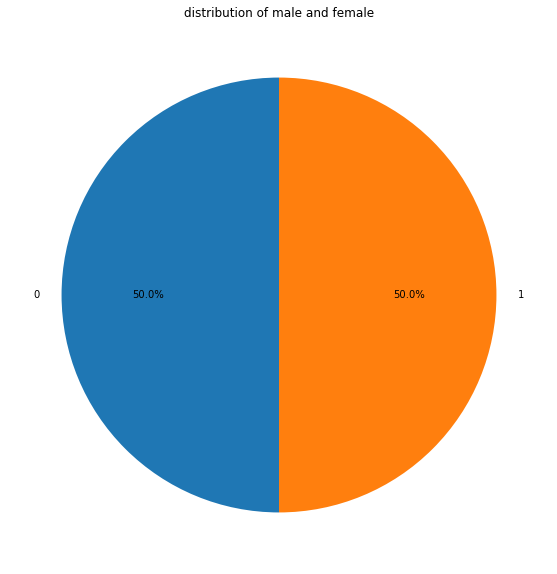

In [163]:
plt.figure(figsize=(10,10))
plt.pie(data_pie.percentage_label, labels=data_pie.label, startangle=90, autopct='%.1f%%')
plt.title('distribution of male and female')
plt.show()# 0=female,1=male

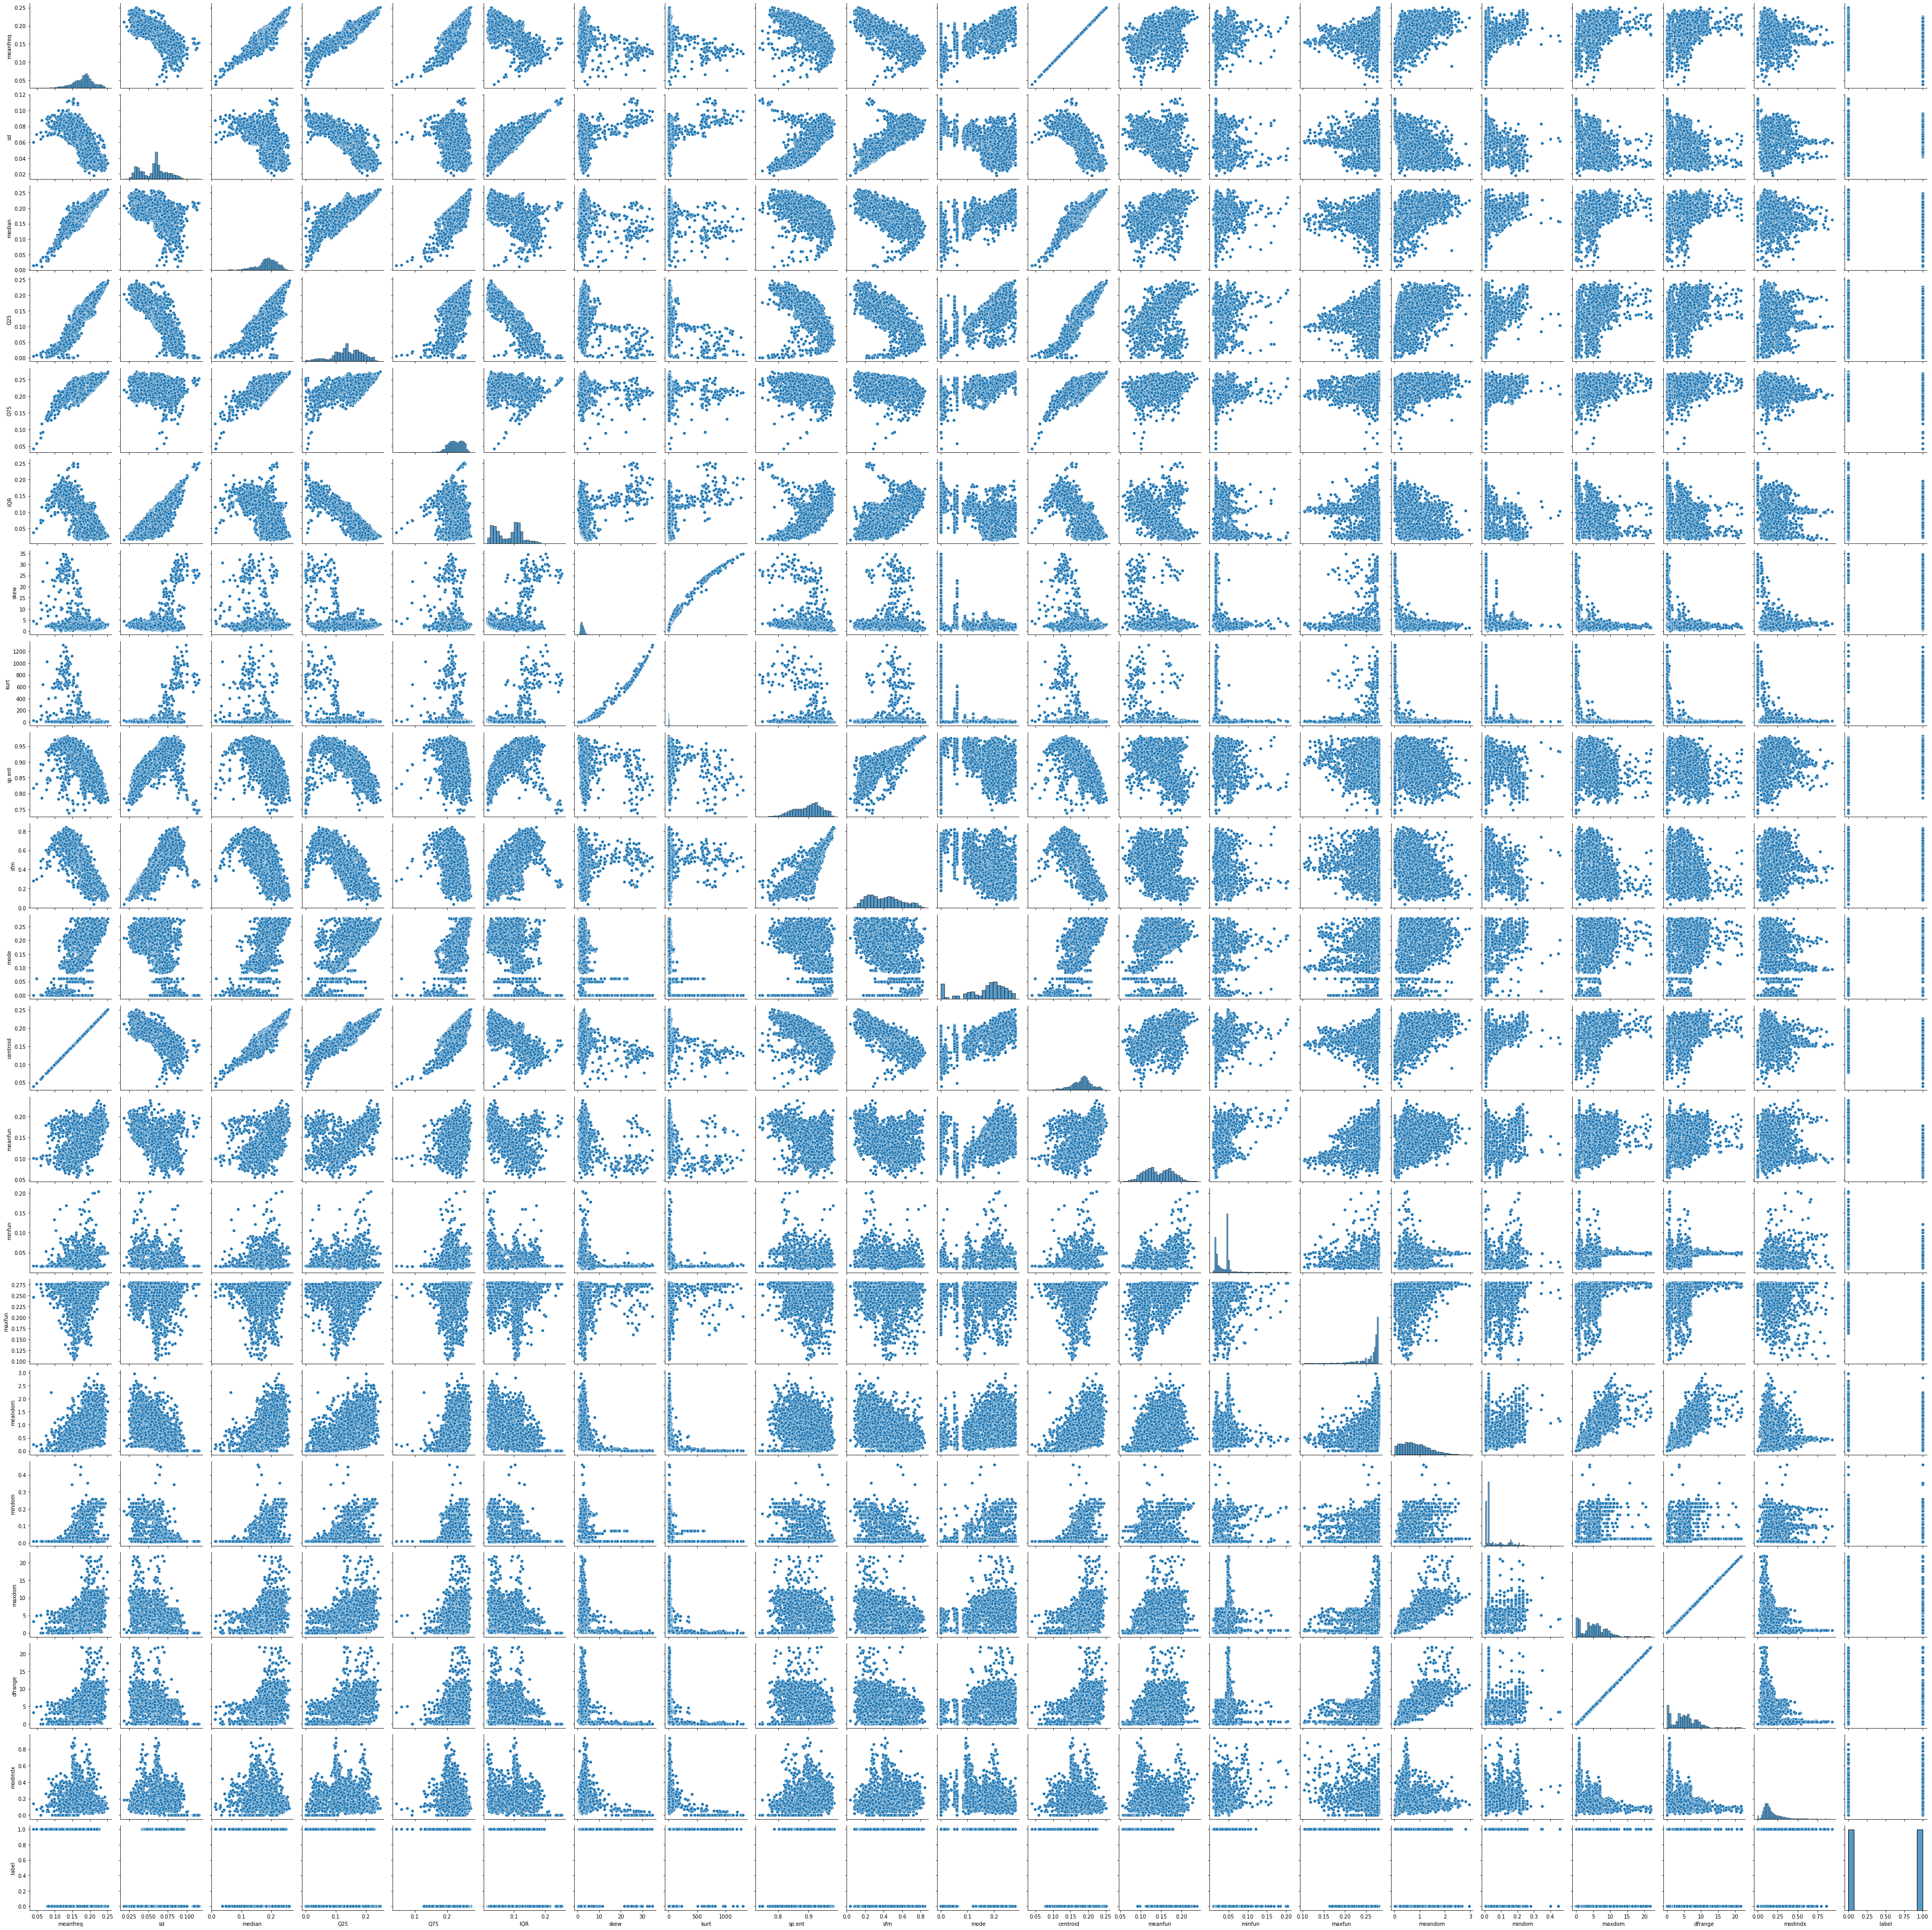

In [164]:
sns.pairplot(df)
plt.show()

In [165]:
X=df.drop('label',axis=1)
y=df.label

In [166]:
X.head(5)

meanfreq        sd    median       Q25       Q75       IQR       skew  \
0  0.059781  0.064241  0.032027  0.015071  0.090193  0.075122  12.863462   
1  0.066009  0.067310  0.040229  0.019414  0.092666  0.073252  22.423285   
2  0.077316  0.083829  0.036718  0.008701  0.131908  0.123207  30.757155   
3  0.151228  0.072111  0.158011  0.096582  0.207955  0.111374   1.232831   
4  0.135120  0.079146  0.124656  0.078720  0.206045  0.127325   1.101174   

          kurt    sp.ent       sfm      mode  centroid   meanfun    minfun  \
0   274.402905  0.893369  0.491918  0.000000  0.059781  0.084279  0.015702   
1   634.613855  0.892193  0.513724  0.000000  0.066009  0.107937  0.015826   
2  1024.927705  0.846389  0.478905  0.000000  0.077316  0.098706  0.015656   
3     4.177296  0.963322  0.727232  0.083878  0.151228  0.088965  0.017798   
4     4.333713  0.971955  0.783568  0.104261  0.135120  0.106398  0.016931   

     maxfun   meandom    mindom    maxdom   dfrange   modindx  
0  0.275862  0.007812  0.007812  0.007812  0.000000  0.000000  
1  0.250000  0.009014  0.007812  0.054688  0.046875  0.052632  
2  0.271186  0.007990  0.007812  0.015625  0.007812  0.046512  
3  0.250000  0.201497  0.007812  0.562500  0.554688  0.247119  
4  0.266667  0.712812  0.007812  5.484375  5.476562  0.208274

In [167]:
y.head(5)

0    1
1    1
2    1
3    1
4    1
Name: label, dtype: int64

### train test split with test size 20

In [186]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=1)

In [187]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2532, 20), (634, 20), (2532,), (634,))

In [188]:
X_train.head()

meanfreq        sd    median       Q25       Q75       IQR      skew  \
416   0.193229  0.060320  0.212121  0.135455  0.241818  0.106364  1.103418   
1626  0.195583  0.057805  0.202357  0.190711  0.231473  0.040763  3.922638   
2690  0.197922  0.042574  0.196527  0.166541  0.235022  0.068480  0.994005   
775   0.169332  0.059449  0.174708  0.112722  0.216528  0.103806  1.111904   
1550  0.155635  0.059006  0.127799  0.107260  0.213643  0.106382  3.170544   

           kurt    sp.ent       sfm      mode  centroid   meanfun    minfun  \
416    3.599008  0.930271  0.479641  0.234848  0.193229  0.110114  0.017544   
1626  24.293758  0.892376  0.432588  0.200173  0.195583  0.150180  0.017186   
2690   2.880871  0.899215  0.295974  0.195311  0.197922  0.156971  0.047198   
775    4.056511  0.938708  0.464443  0.170038  0.169332  0.098358  0.020806   
1550  15.725238  0.897425  0.390670  0.108840  0.155635  0.118877  0.067568   

        maxfun   meandom    mindom    maxdom   dfrange   modindx  
416   0.228571  0.931250  0.148438  6.593750  6.445312  0.213485  
1626  0.250000  0.462813  0.007812  1.906250  1.898438  0.195742  
2690  0.277457  0.897461  0.023438  4.078125  4.054688  0.131820  
775   0.271186  0.740848  0.085938  3.914062  3.828125  0.254022  
1550  0.263158  0.406291  0.058594  0.795898  0.737305  0.555960

### Decision Tree Classifier

In [189]:
from sklearn.tree import DecisionTreeRegressor

dec_tree = DecisionTreeRegressor(random_state=0)
dec_tree.fit(X_train,y_train)
dec_tree_y_pred = dec_tree.predict(X_train)
print("Accuracy: {}".format(dec_tree.score(X_train,y_train)))


Accuracy: 1.0


### Random Forest Classifier

In [190]:
from sklearn.ensemble import RandomForestRegressor

rf_tree = RandomForestRegressor(random_state=0)
rf_tree.fit(X_train,y_train)
rf_tree_y_pred = rf_tree.predict(X_train)
print("Accuracy: {}".format(rf_tree.score(X_train,y_train)))

Accuracy: 0.9893243611856474


### KNN Classifier

In [191]:
# Training and Predictions
from sklearn.neighbors import KNeighborsClassifier 

classifier = KNeighborsClassifier(n_neighbors=5)  
classifier.fit(X_train, y_train)
classifier_y_pred = classifier.predict(X_train)
print("Accuracy: {}".format(classifier.score(X_train,y_train)))

Accuracy: 0.8191153238546603


### SVM Classifier

In [192]:
from sklearn import svm
clf = svm.SVC()
clf.fit(X_train,y_train)

clf_y_pred = clf.predict(X_train)
print("Accuracy: {}".format(clf.score(X_train,y_train)))

Accuracy: 0.6725908372827805


### Logistic Regression

In [193]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
logreg_y_pred = logreg.predict(X_train)
print("Accuracy: {}".format(logreg.score(X_train,y_train)))

Accuracy: 0.905608214849921


In [194]:
# predict y over X_test data
y_pred=logreg.predict(X_test)

In [195]:
pd.DataFrame(zip(y_train, y_pred), columns=['Actual','Predicted']).head(5)

Actual  Predicted
0       1          1
1       0          0
2       0          1
3       1          0
4       1          0

### confusion_matrix 

In [196]:
# checking the score of model
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

In [197]:
# Accuracy on train data
accuracy_score(y_test, y_pred)

0.8927444794952681

In [198]:
# Accuracy on test data
accuracy_score(y_test, y_pred)

0.8927444794952681

In [199]:
confusion_matrix(y_test, y_pred)

array([[249,  52],
       [ 16, 317]], dtype=int64)

In [200]:
cm = pd.DataFrame(confusion_matrix(y_test, y_pred))
cm

0    1
0  249   52
1   16  317

In [201]:
print(classification_report(y_test, y_pred)) 

              precision    recall  f1-score   support

           0       0.94      0.83      0.88       301
           1       0.86      0.95      0.90       333

    accuracy                           0.89       634
   macro avg       0.90      0.89      0.89       634
weighted avg       0.90      0.89      0.89       634



### Comparison of Accuracy Score:

In [202]:
classification_Type=['Desicion Tree Classifier','Random Forest ','KNN Classifier','SVM','logistic regression']
score=['100%','98%','81%','67%','90%']

In [203]:
df_new={"Classification_Types":classification_Type,"Score":score}
df_new1=pd.DataFrame(df_new)
print(df_new1)

       Classification_Types Score
0  Desicion Tree Classifier  100%
1            Random Forest    98%
2            KNN Classifier   81%
3                       SVM   67%
4       logistic regression   90%


In this blog-post we mainly focused on prediction accuracy and predicting whether a person is male or female using our classification models.Our models looks pretty good and are ready to make prediction on the classification problem.We identified the best fit machine learning model for this problem i.e (person is male or female).Such Models maximizes the prediction accuracy. Therefore we compared different algorithm and find out which is the best-suited one.